# Experiments for deep cognitive drone mapping

In [5]:
# =============== Processing graph =====================
#
#                      image
#                        |
#                        | variable name: img
#                        v
#           ---------------------------
#           |mid_level_representations| directly with visualpriors pip install
#           ---------------------------
#                        |
#                        | variable name: mid_level
#                        v
#               ---------------------
#               |  fc ->  decoder   |  content : two functions, fully-connected layer "fc" and decoder resnet "decoder"
#               ---------------------
#                        |
#                        | variable name: map_update
#                        v
#                   -------------        -----------------
#  TODO: Implement  |  combine  |   <--  |   transform   | <--- previous_map
#                   -------------        -----------------
#                        |
#                        | variable name: map
#                        v
#                 ---------------
#  TODO: Implement|   policy    |
#                 ---------------
#                        |
#                        |
#                        v
#                   velocities
#

## Mid-level test

download image to debug...
Passing mid level encoder...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Done!


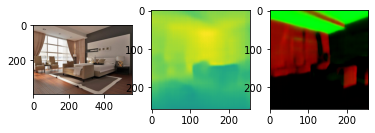

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from experiment import *
image, depth, normal = mid_level()

f, axarr = plt.subplots(1,3) 

axarr[0].imshow(image)
axarr[1].imshow(np.array(depth[0][0]))
axarr[2].imshow(np.array(normal.permute(1,2,0)))

## Reshaping functions

In [1]:
from experiment import *

cogmap, transformed_map = test_geom_transform()

download image to debug...
Done!


/Users/renard/miniconda3/envs/habitat/lib/python3.6/site-packages/torch/nn/functional.py:2764: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/Users/renard/miniconda3/envs/habitat/lib/python3.6/site-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


In [5]:
transformed_map[0,0,:,:]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [12]:
image = Image.open('Bedroom.jpg')
    

o_t = TF.to_tensor(TF.resize(image, 256))[0:1] * 2 - 1

o_t.size()

torch.Size([1, 256, 365])

In [5]:
import torch
import numpy as np
from scipy.spatial.transform import Rotation as R

fwd = 1.
left = 2.
angle = 0.1

r = np.array([R.from_euler('z',angle).as_matrix()[0:2,0:2]])
x = np.array([[[fwd],[left]]])
T = torch.tensor(np.concatenate([r,x],axis=2))

T


tensor([[[ 0.9950, -0.0998,  1.0000],
         [ 0.0998,  0.9950,  2.0000]]], dtype=torch.float64)

In [ ]:
torch.tensor